In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import mixture
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn import random_projection
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import pickle

import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np

In [2]:
bd = pd.read_csv('./NNData_87.csv')
sd = pd.read_csv('./cfb22_nn_w1_w9.csv')

In [3]:
sd = sd.dropna(axis=0)

In [4]:
bd_target = bd[['home_team_cover_spread']]
sd_target = sd[['home_team_cover_spread']]

In [5]:
bd = bd.drop(['Unnamed: 0','index', 'home_team_cover_spread' ,'year', 'home_conference_ACC', 'home_conference_American Athletic',
       'home_conference_Big 12', 'home_conference_Big Ten',
       'home_conference_Conference USA', 'home_conference_FBS Independents',
       'home_conference_Mid-American', 'home_conference_Mountain West',
       'home_conference_Pac-12', 'home_conference_SEC',
       'home_conference_Sun Belt', 'away_conference_ACC',
       'away_conference_American Athletic', 'away_conference_Big 12',
       'away_conference_Big Ten', 'away_conference_Conference USA',
       'away_conference_FBS Independents', 'away_conference_Mid-American',
       'away_conference_Mountain West', 'away_conference_Pac-12',
       'away_conference_SEC', 'away_conference_Sun Belt', 'neutral_site_False',
       'neutral_site_True'], axis = 1)

In [6]:
sd = sd.drop(['Unnamed: 0', 'home_team_cover_spread', 'home_conference_ACC', 'home_conference_American Athletic',
       'home_conference_Big 12', 'home_conference_Big Ten',
       'home_conference_Conference USA', 'home_conference_FBS Independents',
       'home_conference_Mid-American', 'home_conference_Mountain West',
       'home_conference_Pac-12', 'home_conference_SEC',
       'home_conference_Sun Belt', 'away_conference_ACC',
       'away_conference_American Athletic', 'away_conference_Big 12',
       'away_conference_Big Ten', 'away_conference_Conference USA',
       'away_conference_FBS Independents', 'away_conference_Mid-American',
       'away_conference_Mountain West', 'away_conference_Pac-12',
       'away_conference_SEC', 'away_conference_Sun Belt', 'neutral_site_False',
       'neutral_site_True'],axis=1)

In [7]:
bd_num = bd.copy()
sd_num = sd.copy()

In [8]:
randpbd = random_projection.GaussianRandomProjection(n_components=25).fit_transform(bd_num)

In [9]:
rpbd = pd.DataFrame(randpbd)
rpbd

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.248525,-0.625436,0.432048,0.471590,0.811271,1.135588,-0.183154,-0.616318,0.435450,0.737853,...,-1.132669,1.158650,1.080692,-0.293138,-0.198057,-0.537551,0.625439,0.785262,-0.823905,-0.052437
1,0.862523,-0.193830,0.170102,0.730091,1.938157,0.803978,0.171521,0.144383,0.355512,0.154797,...,-0.848745,0.599388,0.321155,0.013805,-0.733018,-0.442787,0.087255,0.451387,0.005478,-0.499475
2,0.755118,-0.288060,-0.033420,0.638635,1.608531,1.359216,0.141940,-0.220793,0.452927,0.634516,...,-1.102601,0.376414,0.482795,-0.005507,-0.885473,-0.102182,0.300679,0.312349,-0.380693,-0.334385
3,0.894450,-0.487824,0.317237,1.103343,1.574201,1.251419,-0.129460,-0.168079,0.054627,0.603822,...,-0.557880,0.422517,0.569766,0.081895,-0.522400,-0.330166,0.234488,0.648733,-0.227028,-0.628574
4,0.871930,-0.304293,0.633760,0.783997,1.231171,0.729070,0.078982,-0.208040,0.192911,0.535851,...,-0.739664,0.044148,0.677804,0.074196,-0.848543,-0.549243,-0.051645,0.442855,0.123633,-0.187716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0.714164,0.041024,0.767098,0.631731,1.730388,0.469845,0.402316,-0.039535,0.371766,0.056263,...,-0.556753,-0.255456,0.575627,0.015539,-1.123909,-0.735329,0.033388,0.133507,0.522308,-0.366944
4740,0.672309,-0.140362,0.613061,0.718748,1.630732,0.543299,-0.036338,-0.168568,0.228228,0.290135,...,-0.830600,0.452875,0.358345,-0.325297,-0.547613,-0.407592,0.193470,0.472415,0.102547,-0.083011
4741,0.569985,0.096903,0.349269,0.860523,1.413608,0.484389,0.077248,0.019694,0.290517,0.295724,...,-0.988865,0.456799,0.316180,0.092145,-0.724038,-0.536519,0.021828,0.274507,0.053603,-0.207080
4742,0.617381,-0.510116,0.460262,0.857961,1.487392,0.807197,0.156538,-0.379399,0.124322,0.729310,...,-0.925278,0.651049,0.706852,-0.263574,-0.674081,-0.575228,0.121107,0.412849,-0.155396,-0.372935


In [10]:
rpbd['target'] = bd_target

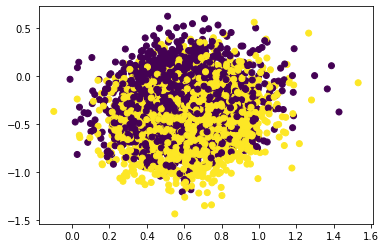

In [11]:
plt.scatter(rpbd.iloc[:, 0], rpbd.iloc[:, 1], c = rpbd['target'])

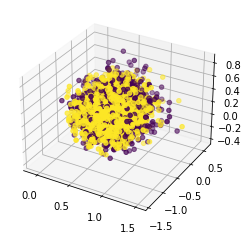

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(rpbd.iloc[:, 0], rpbd.iloc[:, 1], rpbd.iloc[:, 6],c=rpbd['target'])

## RP BD NN

In [13]:
rpbd = rpbd.drop('target',axis=1)
rpbd

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.248525,-0.625436,0.432048,0.471590,0.811271,1.135588,-0.183154,-0.616318,0.435450,0.737853,...,-1.132669,1.158650,1.080692,-0.293138,-0.198057,-0.537551,0.625439,0.785262,-0.823905,-0.052437
1,0.862523,-0.193830,0.170102,0.730091,1.938157,0.803978,0.171521,0.144383,0.355512,0.154797,...,-0.848745,0.599388,0.321155,0.013805,-0.733018,-0.442787,0.087255,0.451387,0.005478,-0.499475
2,0.755118,-0.288060,-0.033420,0.638635,1.608531,1.359216,0.141940,-0.220793,0.452927,0.634516,...,-1.102601,0.376414,0.482795,-0.005507,-0.885473,-0.102182,0.300679,0.312349,-0.380693,-0.334385
3,0.894450,-0.487824,0.317237,1.103343,1.574201,1.251419,-0.129460,-0.168079,0.054627,0.603822,...,-0.557880,0.422517,0.569766,0.081895,-0.522400,-0.330166,0.234488,0.648733,-0.227028,-0.628574
4,0.871930,-0.304293,0.633760,0.783997,1.231171,0.729070,0.078982,-0.208040,0.192911,0.535851,...,-0.739664,0.044148,0.677804,0.074196,-0.848543,-0.549243,-0.051645,0.442855,0.123633,-0.187716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0.714164,0.041024,0.767098,0.631731,1.730388,0.469845,0.402316,-0.039535,0.371766,0.056263,...,-0.556753,-0.255456,0.575627,0.015539,-1.123909,-0.735329,0.033388,0.133507,0.522308,-0.366944
4740,0.672309,-0.140362,0.613061,0.718748,1.630732,0.543299,-0.036338,-0.168568,0.228228,0.290135,...,-0.830600,0.452875,0.358345,-0.325297,-0.547613,-0.407592,0.193470,0.472415,0.102547,-0.083011
4741,0.569985,0.096903,0.349269,0.860523,1.413608,0.484389,0.077248,0.019694,0.290517,0.295724,...,-0.988865,0.456799,0.316180,0.092145,-0.724038,-0.536519,0.021828,0.274507,0.053603,-0.207080
4742,0.617381,-0.510116,0.460262,0.857961,1.487392,0.807197,0.156538,-0.379399,0.124322,0.729310,...,-0.925278,0.651049,0.706852,-0.263574,-0.674081,-0.575228,0.121107,0.412849,-0.155396,-0.372935


In [14]:
trainx, testx, trainy, testy = train_test_split(rpbd, bd_target, test_size=.3, random_state=42)

In [15]:
rpbd_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [16]:
rpbd_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [17]:
y_train_pred = rpbd_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = rpbd_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.7228915662650602
Test accuracy:  0.7120786516853933


## RP SD

In [18]:
from sklearn.metrics.pairwise import euclidean_distances
rpsd_means =[]
rpsd_sd = []
abs_diff = []
for i in range(500):
    randpsd = random_projection.GaussianRandomProjection(n_components=8)
    X_transform = randpsd.fit_transform(sd_num)
    dist_raw = euclidean_distances(sd_num)
    dist_transform = euclidean_distances(X_transform)
    abs_diff_gauss = abs(dist_raw - dist_transform) 
    rpsd_means.append(dist_transform.mean())
    rpsd_sd.append(dist_transform.std())
    abs_diff.append(abs_diff_gauss.mean())
    

Text(0.5, 1.0, 'RP Transform Variation Over 500 Iterations')

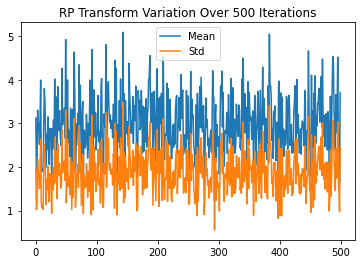

In [19]:
plt.plot(range(500),rpsd_means, label="Mean")
plt.plot(range(500), rpsd_sd, label="Std")
plt.legend()
plt.title("RP Transform Variation Over 500 Iterations")

Text(0.5, 1.0, 'RP Absolute Distance Difference Variation Over 500 Iterations')

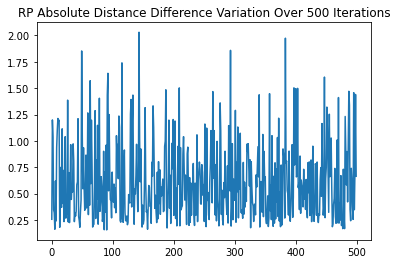

In [20]:
plt.plot(range(500),abs_diff)
plt.title("RP Absolute Distance Difference Variation Over 500 Iterations")

In [21]:
randpsd = random_projection.GaussianRandomProjection(n_components=8).fit_transform(sd_num)

In [22]:
rpsd = pd.DataFrame(randpsd)
rpsd['target'] = sd_target
rpsd

,0,1,2,3,4,5,6,7,target
0,-0.377141,0.050213,-0.276826,-0.379286,-0.695779,0.390711,-0.054961,-0.255882,1.0
1,-0.235460,0.485961,0.325447,-0.558318,-0.311721,0.556795,-0.078335,-0.511906,1.0
2,-0.107350,0.239701,0.353093,-0.631987,-0.558464,0.562601,-0.078365,-0.441911,0.0
3,-0.244845,0.085735,-0.037364,-0.804887,-0.594790,0.215619,-0.236546,-0.420829,0.0
4,-0.337777,0.144629,-0.017556,-0.599368,-0.502981,0.063935,-0.193724,-0.442991,0.0
...,...,...,...,...,...,...,...,...,...
452,-1.251661,6.358605,6.323410,-6.303318,1.039482,-2.124620,-2.101379,1.256626,0.0
453,-1.443726,6.108642,6.324985,-6.214959,0.754901,-2.113794,-2.006892,1.180574,1.0
454,-1.378320,5.917344,6.238506,-6.006366,0.600140,-2.640212,-2.088661,1.510558,0.0
455,-1.493944,6.139145,6.740600,-5.799125,0.731992,-2.441016,-1.908238,1.360673,1.0


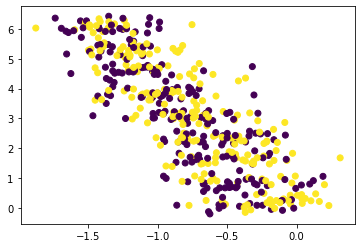

In [23]:
plt.scatter(rpsd.iloc[:, 0], rpsd.iloc[:, 1], c = rpsd['target'])

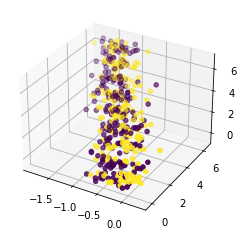

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(rpsd.iloc[:, 0], rpsd.iloc[:, 1], rpsd.iloc[:, 2],c=rpsd['target'])

## RP SD NN

In [25]:
rpsd = rpsd.drop('target',axis=1)
rpsd

,0,1,2,3,4,5,6,7
0,-0.377141,0.050213,-0.276826,-0.379286,-0.695779,0.390711,-0.054961,-0.255882
1,-0.235460,0.485961,0.325447,-0.558318,-0.311721,0.556795,-0.078335,-0.511906
2,-0.107350,0.239701,0.353093,-0.631987,-0.558464,0.562601,-0.078365,-0.441911
3,-0.244845,0.085735,-0.037364,-0.804887,-0.594790,0.215619,-0.236546,-0.420829
4,-0.337777,0.144629,-0.017556,-0.599368,-0.502981,0.063935,-0.193724,-0.442991
...,...,...,...,...,...,...,...,...
452,-1.251661,6.358605,6.323410,-6.303318,1.039482,-2.124620,-2.101379,1.256626
453,-1.443726,6.108642,6.324985,-6.214959,0.754901,-2.113794,-2.006892,1.180574
454,-1.378320,5.917344,6.238506,-6.006366,0.600140,-2.640212,-2.088661,1.510558
455,-1.493944,6.139145,6.740600,-5.799125,0.731992,-2.441016,-1.908238,1.360673


In [26]:
trainx, testx, trainy, testy = train_test_split(rpsd, sd_target, test_size=.3, random_state=42)

In [27]:
rpsd_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [28]:
rpsd_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [29]:
y_train_pred = rpsd_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = rpsd_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.567398119122257
Test accuracy:  0.5072463768115942


## Now cluster the new ICA feutre sets

### Bid Data ICA K means

In [30]:
rpbd

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.248525,-0.625436,0.432048,0.471590,0.811271,1.135588,-0.183154,-0.616318,0.435450,0.737853,...,-1.132669,1.158650,1.080692,-0.293138,-0.198057,-0.537551,0.625439,0.785262,-0.823905,-0.052437
1,0.862523,-0.193830,0.170102,0.730091,1.938157,0.803978,0.171521,0.144383,0.355512,0.154797,...,-0.848745,0.599388,0.321155,0.013805,-0.733018,-0.442787,0.087255,0.451387,0.005478,-0.499475
2,0.755118,-0.288060,-0.033420,0.638635,1.608531,1.359216,0.141940,-0.220793,0.452927,0.634516,...,-1.102601,0.376414,0.482795,-0.005507,-0.885473,-0.102182,0.300679,0.312349,-0.380693,-0.334385
3,0.894450,-0.487824,0.317237,1.103343,1.574201,1.251419,-0.129460,-0.168079,0.054627,0.603822,...,-0.557880,0.422517,0.569766,0.081895,-0.522400,-0.330166,0.234488,0.648733,-0.227028,-0.628574
4,0.871930,-0.304293,0.633760,0.783997,1.231171,0.729070,0.078982,-0.208040,0.192911,0.535851,...,-0.739664,0.044148,0.677804,0.074196,-0.848543,-0.549243,-0.051645,0.442855,0.123633,-0.187716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0.714164,0.041024,0.767098,0.631731,1.730388,0.469845,0.402316,-0.039535,0.371766,0.056263,...,-0.556753,-0.255456,0.575627,0.015539,-1.123909,-0.735329,0.033388,0.133507,0.522308,-0.366944
4740,0.672309,-0.140362,0.613061,0.718748,1.630732,0.543299,-0.036338,-0.168568,0.228228,0.290135,...,-0.830600,0.452875,0.358345,-0.325297,-0.547613,-0.407592,0.193470,0.472415,0.102547,-0.083011
4741,0.569985,0.096903,0.349269,0.860523,1.413608,0.484389,0.077248,0.019694,0.290517,0.295724,...,-0.988865,0.456799,0.316180,0.092145,-0.724038,-0.536519,0.021828,0.274507,0.053603,-0.207080
4742,0.617381,-0.510116,0.460262,0.857961,1.487392,0.807197,0.156538,-0.379399,0.124322,0.729310,...,-0.925278,0.651049,0.706852,-0.263574,-0.674081,-0.575228,0.121107,0.412849,-0.155396,-0.372935


In [31]:
centers = []
inertia = []
for i in range(1,25):
    km = cluster.KMeans(n_clusters=i, random_state=0).fit(rpbd)
    centers.append(km.cluster_centers_)
    inertia.append(km.inertia_)

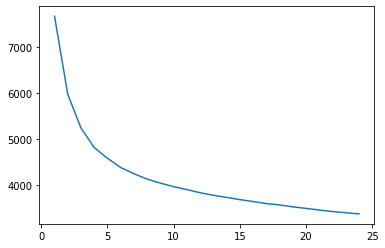

In [32]:
plt.plot(range(1,25),inertia)

In [33]:
kmeansbdrp = cluster.KMeans(n_clusters=4)
kmeansbdrp.fit(rpbd)
y_kmeans = kmeansbdrp.predict(rpbd)

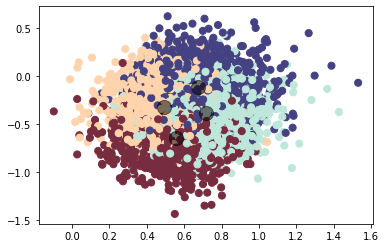

In [34]:
plt.scatter(rpbd.iloc[:, 0], rpbd.iloc[:, 1], c=y_kmeans, s=50, cmap='icefire')

centers = kmeansbdrp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

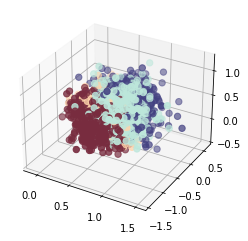

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(rpbd.iloc[:,0],rpbd.iloc[:,1],rpbd.iloc[:,2], c=y_kmeans, s=40, cmap='icefire')

## RP BD KM NN

In [36]:
kmeansbdrplabels = kmeansbdrp.labels_
kmeansbdrplabels

array([3, 1, 3, ..., 1, 1, 2])

In [37]:
labelsdf = pd.DataFrame(kmeansbdrplabels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4'])

In [38]:
bd_km_rp_nn_df = pd.concat([rpbd,labelsdf2], axis=1)
bd_km_rp_nn_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,C1,C2,C3,C4
0,0.248525,-0.625436,0.432048,0.471590,0.811271,1.135588,-0.183154,-0.616318,0.435450,0.737853,...,-0.198057,-0.537551,0.625439,0.785262,-0.823905,-0.052437,0.0,0.0,0.0,1.0
1,0.862523,-0.193830,0.170102,0.730091,1.938157,0.803978,0.171521,0.144383,0.355512,0.154797,...,-0.733018,-0.442787,0.087255,0.451387,0.005478,-0.499475,0.0,1.0,0.0,0.0
2,0.755118,-0.288060,-0.033420,0.638635,1.608531,1.359216,0.141940,-0.220793,0.452927,0.634516,...,-0.885473,-0.102182,0.300679,0.312349,-0.380693,-0.334385,0.0,0.0,0.0,1.0
3,0.894450,-0.487824,0.317237,1.103343,1.574201,1.251419,-0.129460,-0.168079,0.054627,0.603822,...,-0.522400,-0.330166,0.234488,0.648733,-0.227028,-0.628574,0.0,1.0,0.0,0.0
4,0.871930,-0.304293,0.633760,0.783997,1.231171,0.729070,0.078982,-0.208040,0.192911,0.535851,...,-0.848543,-0.549243,-0.051645,0.442855,0.123633,-0.187716,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0.714164,0.041024,0.767098,0.631731,1.730388,0.469845,0.402316,-0.039535,0.371766,0.056263,...,-1.123909,-0.735329,0.033388,0.133507,0.522308,-0.366944,1.0,0.0,0.0,0.0
4740,0.672309,-0.140362,0.613061,0.718748,1.630732,0.543299,-0.036338,-0.168568,0.228228,0.290135,...,-0.547613,-0.407592,0.193470,0.472415,0.102547,-0.083011,0.0,1.0,0.0,0.0
4741,0.569985,0.096903,0.349269,0.860523,1.413608,0.484389,0.077248,0.019694,0.290517,0.295724,...,-0.724038,-0.536519,0.021828,0.274507,0.053603,-0.207080,0.0,1.0,0.0,0.0
4742,0.617381,-0.510116,0.460262,0.857961,1.487392,0.807197,0.156538,-0.379399,0.124322,0.729310,...,-0.674081,-0.575228,0.121107,0.412849,-0.155396,-0.372935,0.0,1.0,0.0,0.0


In [39]:
trainx, testx, trainy, testy = train_test_split(bd_km_rp_nn_df, bd_target, test_size=.3, random_state=42)

In [40]:
bd_km_rp_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [41]:
bd_km_rp_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [42]:
y_train_pred = bd_km_rp_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = bd_km_rp_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.7159638554216867
Test accuracy:  0.7176966292134831


## RP Small Data - Kmeans

In [43]:
centers = []
inertia = []
for i in range(1,25):
    km = cluster.KMeans(n_clusters=i, random_state=0).fit(rpsd)
    centers.append(km.cluster_centers_)
    inertia.append(km.inertia_)

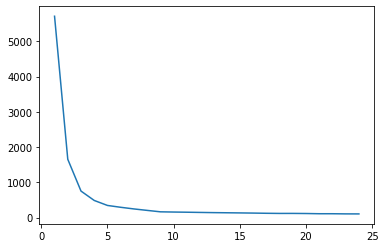

In [44]:
plt.plot(range(1,25),inertia)

In [45]:
kmeansrpsd = cluster.KMeans(n_clusters=4)
kmeansrpsd.fit(rpsd)
y_kmeans = kmeansrpsd.predict(rpsd)

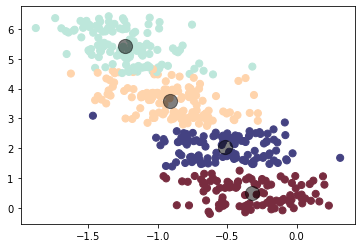

In [46]:
plt.scatter(rpsd.iloc[:, 0], rpsd.iloc[:, 1], c=y_kmeans, s=50, cmap='icefire')

centers = kmeansrpsd.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

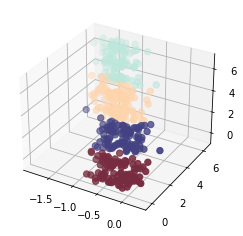

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(rpsd.iloc[:,0],rpsd.iloc[:,1],rpsd.iloc[:,2], c=y_kmeans, s=40, cmap='icefire')

## RP SD KM NN

In [48]:
kmeansrpsdlabels = kmeansrpsd.labels_
kmeansrpsdlabels 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [49]:
labelsdf = pd.DataFrame(kmeansrpsdlabels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4'])

In [50]:
sd_km_rp_nn_df = pd.concat([rpsd,labelsdf2], axis=1)
sd_km_rp_nn_df

,0,1,2,3,4,5,6,7,C1,C2,C3,C4
0,-0.377141,0.050213,-0.276826,-0.379286,-0.695779,0.390711,-0.054961,-0.255882,0.0,0.0,1.0,0.0
1,-0.235460,0.485961,0.325447,-0.558318,-0.311721,0.556795,-0.078335,-0.511906,0.0,0.0,1.0,0.0
2,-0.107350,0.239701,0.353093,-0.631987,-0.558464,0.562601,-0.078365,-0.441911,0.0,0.0,1.0,0.0
3,-0.244845,0.085735,-0.037364,-0.804887,-0.594790,0.215619,-0.236546,-0.420829,0.0,0.0,1.0,0.0
4,-0.337777,0.144629,-0.017556,-0.599368,-0.502981,0.063935,-0.193724,-0.442991,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
452,-1.251661,6.358605,6.323410,-6.303318,1.039482,-2.124620,-2.101379,1.256626,1.0,0.0,0.0,0.0
453,-1.443726,6.108642,6.324985,-6.214959,0.754901,-2.113794,-2.006892,1.180574,1.0,0.0,0.0,0.0
454,-1.378320,5.917344,6.238506,-6.006366,0.600140,-2.640212,-2.088661,1.510558,1.0,0.0,0.0,0.0
455,-1.493944,6.139145,6.740600,-5.799125,0.731992,-2.441016,-1.908238,1.360673,1.0,0.0,0.0,0.0


In [51]:
trainx, testx, trainy, testy = train_test_split(sd_km_rp_nn_df, sd_target, test_size=.3, random_state=42)

In [52]:
sd_km_rp_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [53]:
sd_km_rp_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [54]:
y_train_pred = sd_km_rp_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = sd_km_rp_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.5078369905956113
Test accuracy:  0.4855072463768116


## RP Big Data GMM

In [55]:
# ~ 2 min
gmm_bic = []
gmm_aic = []
for i in range(1,25):
    gmm = mixture.GaussianMixture(n_components=i, random_state=0).fit(rpbd)
    gmm_bic.append(gmm.bic(rpbd))
    gmm_aic.append(gmm.aic(rpbd))

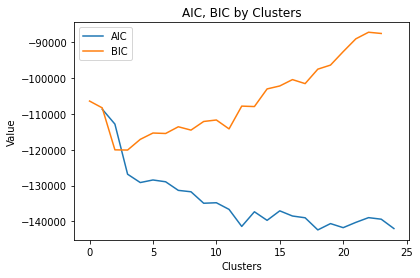

In [56]:
r = np.arange(1,25)
plt.plot(r, gmm_aic, gmm_bic)
plt.title("AIC, BIC by Clusters")
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.legend(labels = ['AIC', 'BIC'])
plt.show()

In [57]:
# We will take AIC + BIC recommendation for simpler model and set K = 4
gmm = mixture.GaussianMixture(n_components=4).fit(rpbd)
labels = gmm.predict(rpbd)
print(gmm.converged_)

True


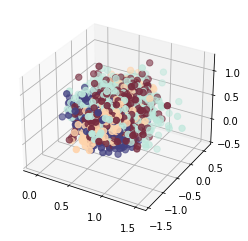

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(rpbd.iloc[:,0],rpbd.iloc[:,1] ,rpbd.iloc[:,2], c=labels, s=40, cmap='icefire')

## RP BD GMM NN

In [59]:
labels

array([0, 0, 0, ..., 3, 3, 1], dtype=int64)

In [60]:
labelsdf = pd.DataFrame(labels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4'])

In [61]:
bd_rp_gmm_nn_df = pd.concat([rpbd,labelsdf2], axis=1)
bd_rp_gmm_nn_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,C1,C2,C3,C4
0,0.248525,-0.625436,0.432048,0.471590,0.811271,1.135588,-0.183154,-0.616318,0.435450,0.737853,...,-0.198057,-0.537551,0.625439,0.785262,-0.823905,-0.052437,1.0,0.0,0.0,0.0
1,0.862523,-0.193830,0.170102,0.730091,1.938157,0.803978,0.171521,0.144383,0.355512,0.154797,...,-0.733018,-0.442787,0.087255,0.451387,0.005478,-0.499475,1.0,0.0,0.0,0.0
2,0.755118,-0.288060,-0.033420,0.638635,1.608531,1.359216,0.141940,-0.220793,0.452927,0.634516,...,-0.885473,-0.102182,0.300679,0.312349,-0.380693,-0.334385,1.0,0.0,0.0,0.0
3,0.894450,-0.487824,0.317237,1.103343,1.574201,1.251419,-0.129460,-0.168079,0.054627,0.603822,...,-0.522400,-0.330166,0.234488,0.648733,-0.227028,-0.628574,0.0,0.0,1.0,0.0
4,0.871930,-0.304293,0.633760,0.783997,1.231171,0.729070,0.078982,-0.208040,0.192911,0.535851,...,-0.848543,-0.549243,-0.051645,0.442855,0.123633,-0.187716,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0.714164,0.041024,0.767098,0.631731,1.730388,0.469845,0.402316,-0.039535,0.371766,0.056263,...,-1.123909,-0.735329,0.033388,0.133507,0.522308,-0.366944,0.0,0.0,1.0,0.0
4740,0.672309,-0.140362,0.613061,0.718748,1.630732,0.543299,-0.036338,-0.168568,0.228228,0.290135,...,-0.547613,-0.407592,0.193470,0.472415,0.102547,-0.083011,0.0,0.0,0.0,1.0
4741,0.569985,0.096903,0.349269,0.860523,1.413608,0.484389,0.077248,0.019694,0.290517,0.295724,...,-0.724038,-0.536519,0.021828,0.274507,0.053603,-0.207080,0.0,0.0,0.0,1.0
4742,0.617381,-0.510116,0.460262,0.857961,1.487392,0.807197,0.156538,-0.379399,0.124322,0.729310,...,-0.674081,-0.575228,0.121107,0.412849,-0.155396,-0.372935,0.0,0.0,0.0,1.0


In [62]:
trainx, testx, trainy, testy = train_test_split(bd_rp_gmm_nn_df, bd_target, test_size=.3, random_state=42)

In [63]:
bd_rp_gmm_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [64]:
bd_rp_gmm_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [65]:
y_train_pred = bd_rp_gmm_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = bd_rp_gmm_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.7222891566265061
Test accuracy:  0.7219101123595506


## RP Small Data GMM

In [66]:
# ~ 30s 
gmm_bic = []
gmm_aic = []
for i in range(1,25):
    gmm = mixture.GaussianMixture(n_components=i, random_state=0).fit(rpsd)
    gmm_bic.append(gmm.bic(rpsd))
    gmm_aic.append(gmm.aic(rpsd))

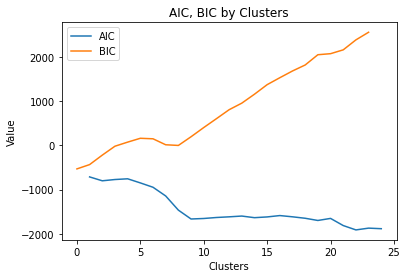

In [67]:
r = np.arange(1,25)
plt.plot(r, gmm_aic, gmm_bic)
plt.title("AIC, BIC by Clusters")
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.legend(labels = ['AIC', 'BIC'])
plt.show()

In [68]:
# Even though AIC rises after 2, for comparison sake we will take AIC + BIC recommendation for simpler model and set K = 2 
gmm = mixture.GaussianMixture(n_components=4).fit(rpsd)
labels = gmm.predict(rpsd)
print(gmm.converged_)

True


In [69]:
labels = gmm.predict(rpsd)
len(labels)

457

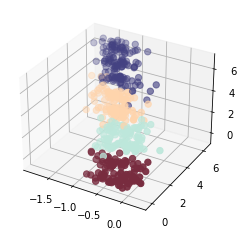

In [70]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(rpsd.iloc[:,0],rpsd.iloc[:,1],rpsd.iloc[:,2], c=labels, s=40, cmap='icefire')

## RP SD GMM NN

In [71]:
labelsdf = pd.DataFrame(labels, columns=["clusters"])
hot = OneHotEncoder().fit_transform(X = labelsdf).toarray()
labelsdf2 = pd.DataFrame(hot, columns= ['C1', 'C2', 'C3', 'C4'])

In [72]:
sd_rp_gmm_nn_df = pd.concat([rpsd,labelsdf2], axis=1)
sd_rp_gmm_nn_df

,0,1,2,3,4,5,6,7,C1,C2,C3,C4
0,-0.377141,0.050213,-0.276826,-0.379286,-0.695779,0.390711,-0.054961,-0.255882,0.0,0.0,1.0,0.0
1,-0.235460,0.485961,0.325447,-0.558318,-0.311721,0.556795,-0.078335,-0.511906,0.0,0.0,1.0,0.0
2,-0.107350,0.239701,0.353093,-0.631987,-0.558464,0.562601,-0.078365,-0.441911,0.0,0.0,1.0,0.0
3,-0.244845,0.085735,-0.037364,-0.804887,-0.594790,0.215619,-0.236546,-0.420829,0.0,0.0,1.0,0.0
4,-0.337777,0.144629,-0.017556,-0.599368,-0.502981,0.063935,-0.193724,-0.442991,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
452,-1.251661,6.358605,6.323410,-6.303318,1.039482,-2.124620,-2.101379,1.256626,0.0,1.0,0.0,0.0
453,-1.443726,6.108642,6.324985,-6.214959,0.754901,-2.113794,-2.006892,1.180574,0.0,1.0,0.0,0.0
454,-1.378320,5.917344,6.238506,-6.006366,0.600140,-2.640212,-2.088661,1.510558,0.0,1.0,0.0,0.0
455,-1.493944,6.139145,6.740600,-5.799125,0.731992,-2.441016,-1.908238,1.360673,0.0,1.0,0.0,0.0


In [73]:
trainx, testx, trainy, testy = train_test_split(sd_rp_gmm_nn_df, sd_target, test_size=.3, random_state=42)

In [74]:
sd_rp_gmm_nn = mlrose.NeuralNetwork(hidden_nodes = [6,6], activation = 'relu', algorithm = 'gradient_descent', max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.0001,
early_stopping = True, clip_max = 5, max_attempts = 1000, random_state = 3)

In [75]:
sd_rp_gmm_nn.fit(trainx,trainy)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[6, 6],
              learning_rate=0.0001, max_iters=5000)

In [76]:
y_train_pred = sd_rp_gmm_nn.predict(trainx)

y_train_accuracy = accuracy_score(trainy, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = sd_rp_gmm_nn.predict(testx)

y_test_accuracy = accuracy_score(testy, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

Training accuracy:  0.5078369905956113
Test accuracy:  0.4855072463768116
